In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
session = tf.compat.v1.InteractiveSession(config=config)

In [4]:
dataset = pd.read_csv("heart.csv")
X = dataset.iloc[:,0:13].values
y = dataset.iloc[:, 13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [6]:
sx = X_test.shape[1]
model = Sequential()
model.add(Dense(128, input_dim = sx ,activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
with tf.device("/gpu:0"):
    history = model.fit(X_train, y_train, epochs = 10, validation_split=0.10)
#y_pred = model.predict(X_test)

Epoch 1/10
8/8 [==============================] - 0s 17ms/step - loss: 0.6455 - accuracy: 0.6364 - val_loss: 0.5470 - val_accuracy: 0.9231
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.5104 - accuracy: 0.7965 - val_loss: 0.3701 - val_accuracy: 0.9231
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.4107 - accuracy: 0.8312 - val_loss: 0.2229 - val_accuracy: 0.9231
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 0.3437 - accuracy: 0.8355 - val_loss: 0.1971 - val_accuracy: 0.9231
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3206 - accuracy: 0.8701 - val_loss: 0.1830 - val_accuracy: 0.9231
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2942 - accuracy: 0.8918 - val_loss: 0.2009 - val_accuracy: 0.9231
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2672 - accuracy: 0.9004 - val_loss: 0.2079 - val_accuracy: 0.9231
Epoch 8/10
8/8 [=================

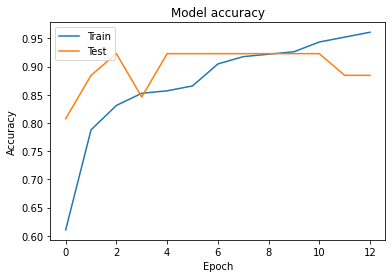

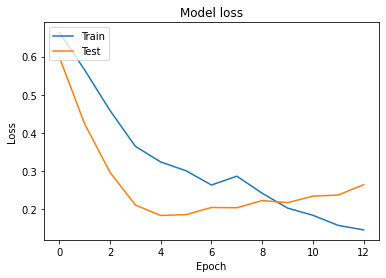

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.savefig('graphs/accuracy.jpg')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.savefig('graphs/loss.jpg')
plt.show()